In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/cricket_data_2025.csv")

# Preview the data
print("Initial shape:", df.shape)
df.head()


Initial shape: (1008, 25)


,Year,Player_Name,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,...,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Best_Bowling_Match,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
0,NaN,Aaron Hardie,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,...,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats,No stats
1,2024.0,Abdul Samad,16,2,182,37*,18.2,108,168.52,0,...,16,0,0,0,0,0,0,0,0,0
2,2023.0,Abdul Samad,9,4,169,37*,42.25,128,132.03,0,...,9,0,0,0,0,0,0,0,0,0
3,2022.0,Abdul Samad,2,0,4,4,2.0,7,57.14,0,...,2,6,8,0,0/8,0,8.00,0,0,0
4,2021.0,Abdul Samad,11,1,111,28,12.33,87,127.58,0,...,11,6,9,1,1/9,9.00,9.00,6.00,0,0


In [4]:
# Replace 'No stats' with NaN
df.replace("No stats", np.nan, inplace=True)

# Remove '*' in Highest Score
df['Highest_Score'] = df['Highest_Score'].str.replace('*', '', regex=False)

# List of numeric columns
numeric_columns = [
    'Year', 'Matches_Batted', 'Not_Outs', 'Runs_Scored', 'Balls_Faced',
    'Batting_Average', 'Batting_Strike_Rate', 'Centuries', 'Half_Centuries',
    'Fours', 'Sixes', 'Catches_Taken', 'Stumpings', 'Matches_Bowled',
    'Balls_Bowled', 'Runs_Conceded', 'Wickets_Taken', 'Bowling_Average',
    'Economy_Rate', 'Bowling_Strike_Rate', 'Four_Wicket_Hauls',
    'Five_Wicket_Hauls', 'Highest_Score'
]

# Convert numeric columns to float
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows without player names
df.dropna(subset=['Player_Name'], inplace=True)

# Final cleaned shape
print("Cleaned shape:", df.shape)


Cleaned shape: (1008, 25)


In [5]:
# Summary statistics
df.describe()


,Year,Matches_Batted,Not_Outs,Runs_Scored,Highest_Score,Batting_Average,Balls_Faced,Batting_Strike_Rate,Centuries,Half_Centuries,...,Stumpings,Matches_Bowled,Balls_Bowled,Runs_Conceded,Wickets_Taken,Bowling_Average,Economy_Rate,Bowling_Strike_Rate,Four_Wicket_Hauls,Five_Wicket_Hauls
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,...,957.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000,958.000000
mean,2019.718913,9.948798,1.629049,144.039707,34.612330,17.842320,104.880878,103.387858,0.053292,0.777429,...,0.131661,9.978079,104.926931,143.370564,5.118998,20.145000,6.041472,13.943653,0.088727,0.021921
std,3.798726,5.084073,1.738474,174.220783,33.029738,16.400096,122.324575,58.624957,0.296920,1.363601,...,0.649598,5.095590,121.639647,160.436237,6.702706,24.138643,4.705152,15.465802,0.328796,0.146501
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2017.000000,5.000000,0.000000,5.000000,4.000000,1.500000,7.000000,66.660000,0.000000,0.000000,...,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,11.000000,1.000000,59.000000,26.000000,16.000000,47.000000,120.990000,0.000000,0.000000,...,0.000000,11.000000,46.000000,69.500000,1.000000,19.210000,7.500000,14.020000,0.000000,0.000000
75%,2023.000000,14.000000,3.000000,248.000000,61.000000,28.900000,179.000000,142.860000,0.000000,1.000000,...,0.000000,14.000000,207.750000,289.000000,9.750000,31.000000,9.080000,22.500000,0.000000,0.000000
max,2024.000000,19.000000,10.000000,973.000000,140.000000,101.000000,640.000000,333.330000,4.000000,8.000000,...,6.000000,19.000000,408.000000,566.000000,32.000000,176.000000,36.000000,102.000000,3.000000,1.000000


In [6]:
# Top 10 Run Scorers
top_batsmen = df.groupby("Player_Name")["Runs_Scored"].sum().sort_values(ascending=False).head(10)
print("Top Run Scorers:\n", top_batsmen)

# Top 10 Wicket Takers
top_bowlers = df.groupby("Player_Name")["Wickets_Taken"].sum().sort_values(ascending=False).head(10)
print("Top Wicket Takers:\n", top_bowlers)


Top Run Scorers:
 Player_Name
Virat Kohli         8004.0
Rohit Sharma        6628.0
MS Dhoni            5243.0
KL Rahul            4683.0
Ajinkya Rahane      4642.0
Faf du Plessis      4571.0
Sanju Samson        4419.0
Manish Pandey       3850.0
Suryakumar Yadav    3594.0
Jos Buttler         3582.0
Name: Runs_Scored, dtype: float64
Top Wicket Takers:
 Player_Name
Yuzvendra Chahal       205.0
Bhuvneshwar Kumar      181.0
Ravichandran Ashwin    180.0
Sunil Narine           180.0
Jasprit Bumrah         165.0
Ravindra Jadeja        160.0
Rashid Khan            149.0
Sandeep Sharma         137.0
Harshal Patel          135.0
Mohit Sharma           132.0
Name: Wickets_Taken, dtype: float64


<ipython-input-7-e8e995dd23a6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="Blues_d")


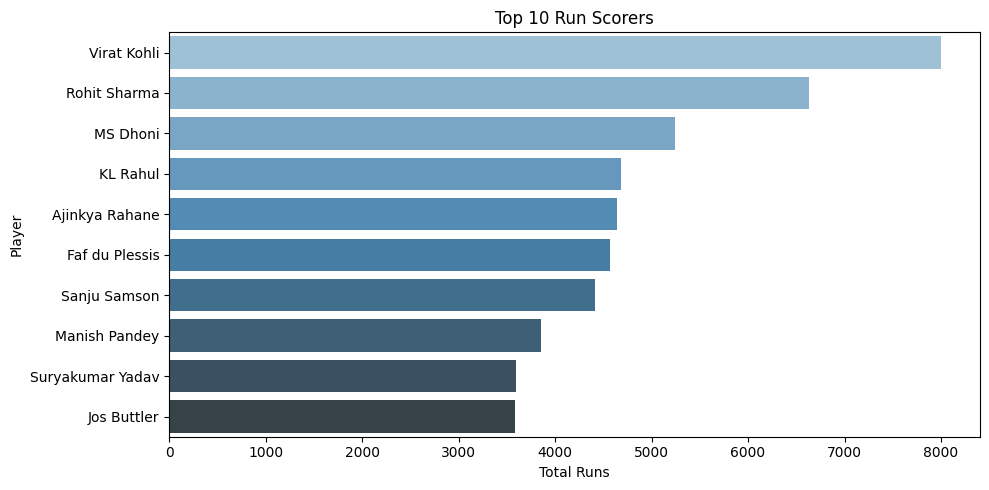

<ipython-input-7-e8e995dd23a6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="Greens_d")


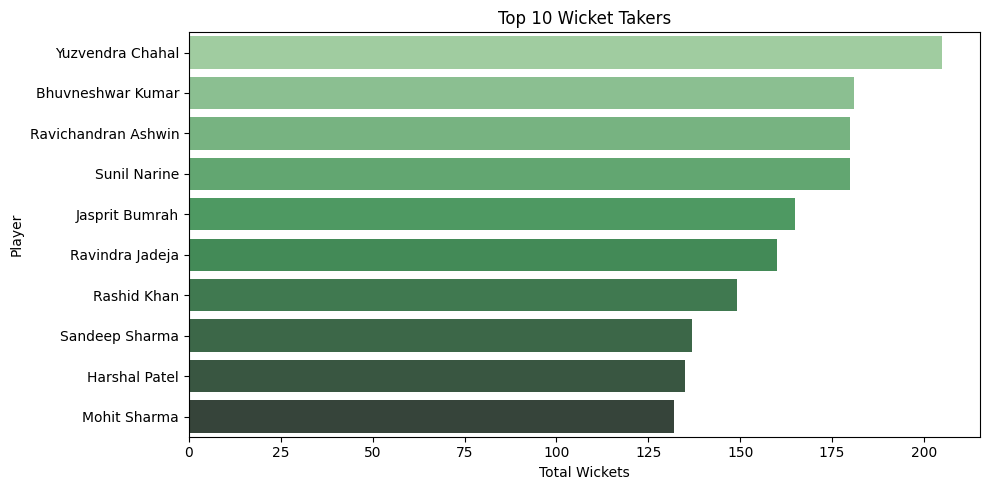

In [7]:
# Top Run Scorers Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="Blues_d")
plt.title("Top 10 Run Scorers")
plt.xlabel("Total Runs")
plt.ylabel("Player")
plt.tight_layout()
plt.show()

# Top Wicket Takers Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette="Greens_d")
plt.title("Top 10 Wicket Takers")
plt.xlabel("Total Wickets")
plt.ylabel("Player")
plt.tight_layout()
plt.show()


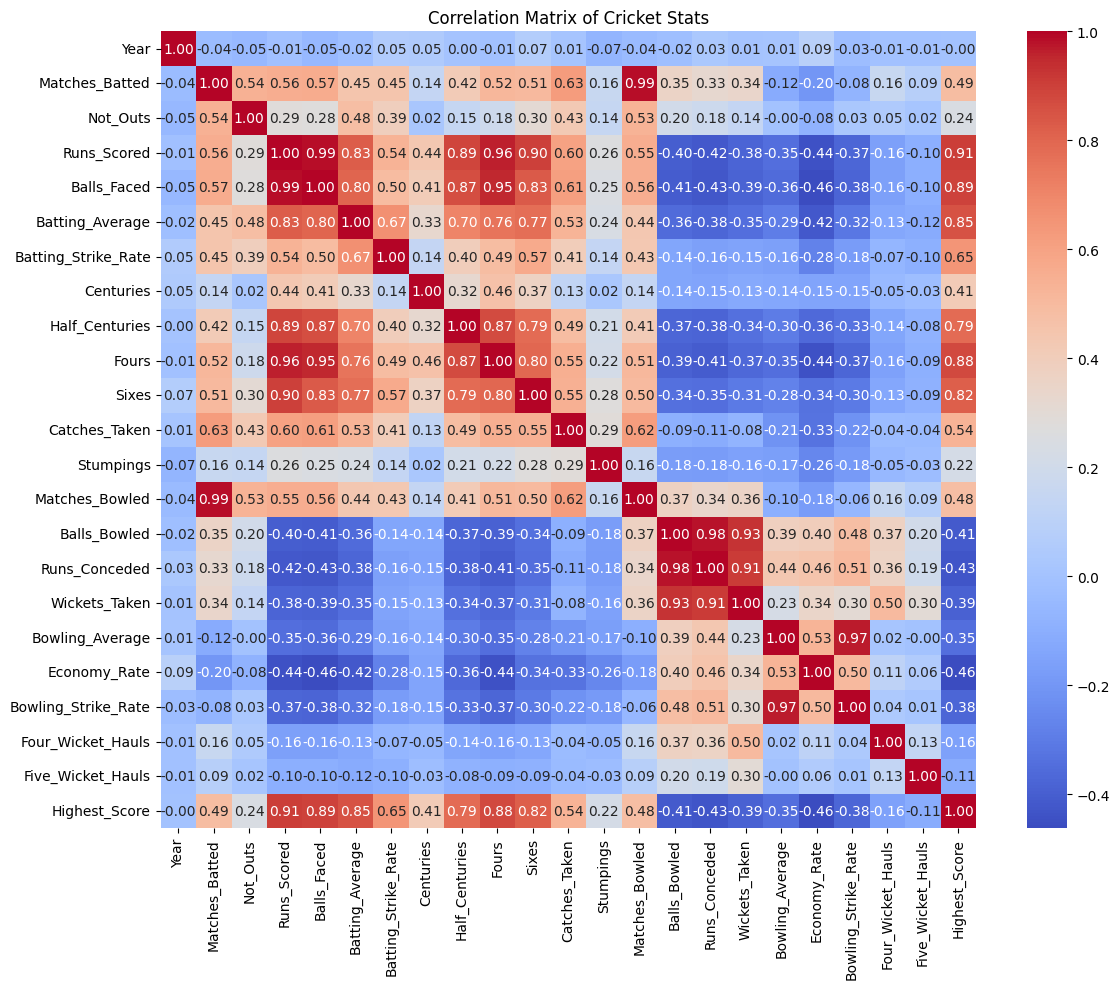

In [8]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df[numeric_columns].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Cricket Stats")
plt.tight_layout()
plt.show()


<ipython-input-9-498fc77679f2>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Year", y="Runs_Scored", hue="Player_Name", estimator="sum", ci=None)
<ipython-input-9-498fc77679f2>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


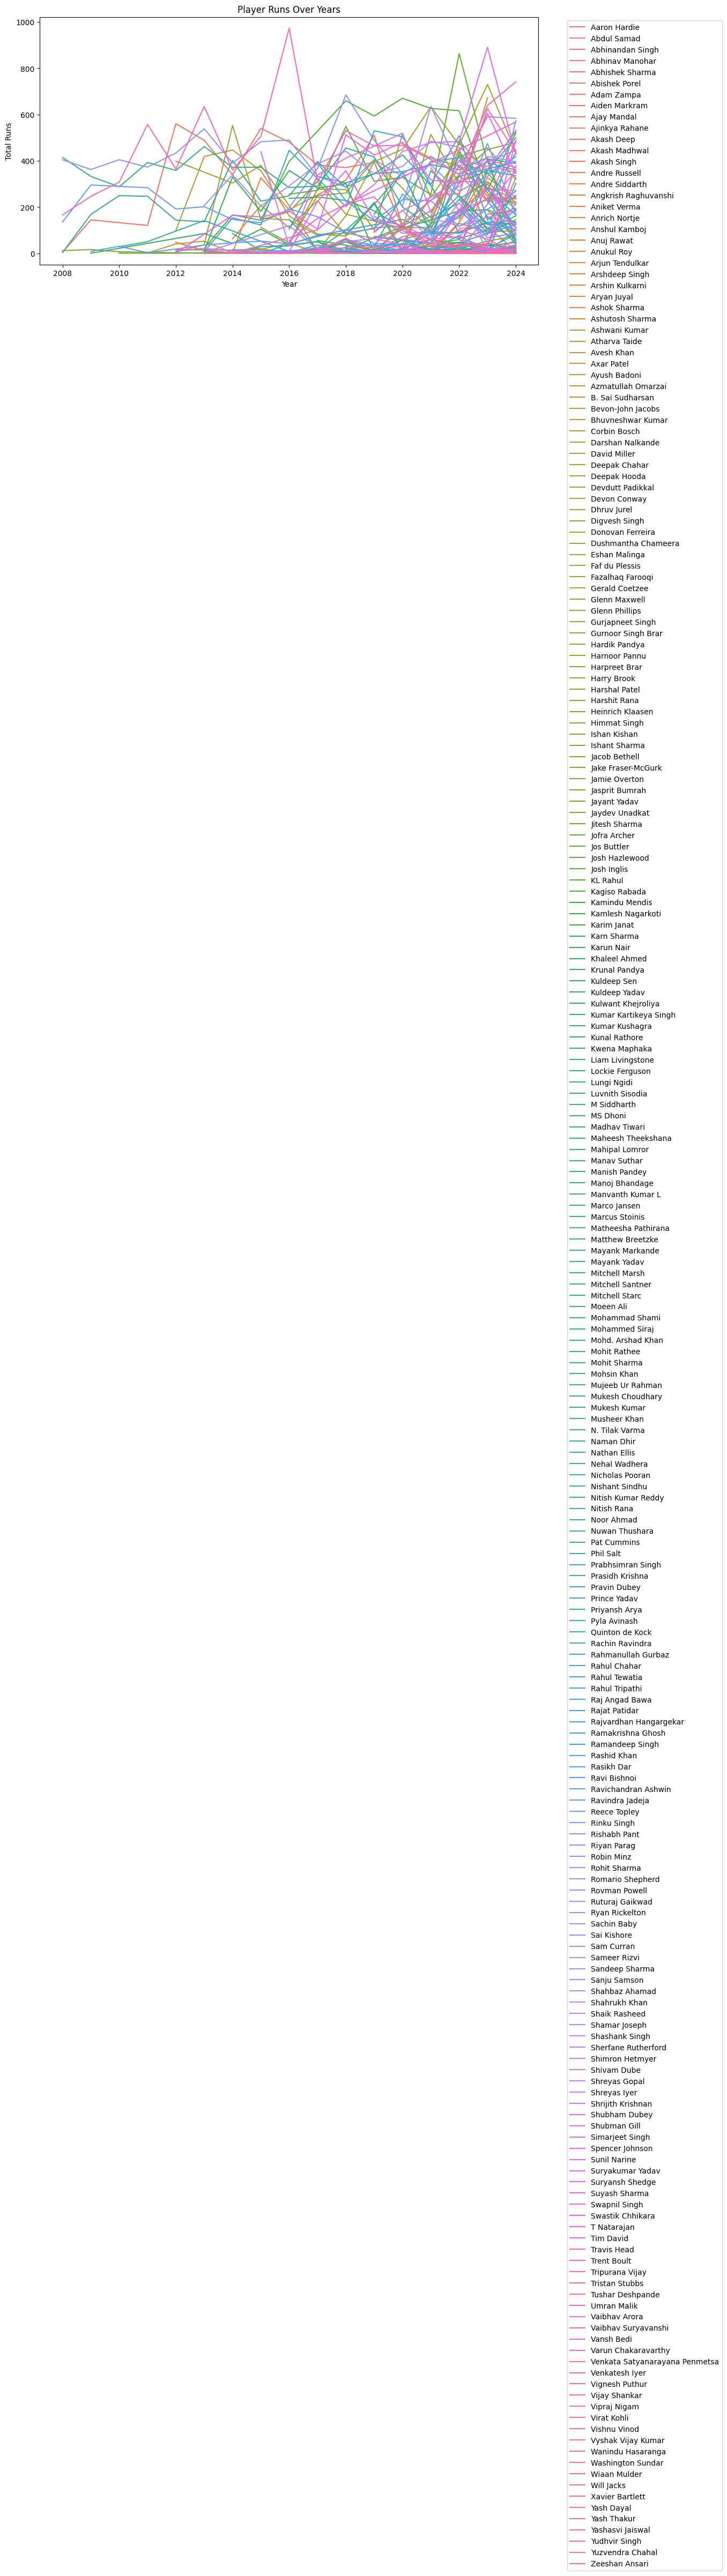

In [9]:
# Player performance over years
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Runs_Scored", hue="Player_Name", estimator="sum", ci=None)
plt.title("Player Runs Over Years")
plt.xlabel("Year")
plt.ylabel("Total Runs")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


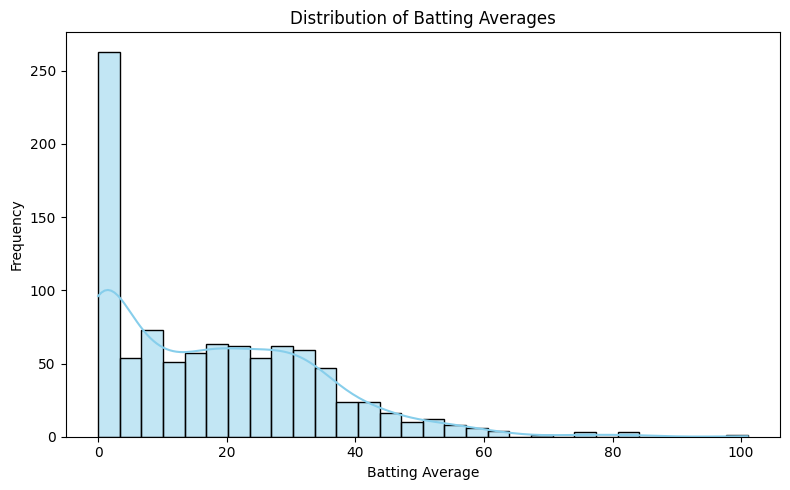

In [10]:
# Distribution of batting averages
plt.figure(figsize=(8, 5))
sns.histplot(df["Batting_Average"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Distribution of Batting Averages")
plt.xlabel("Batting Average")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


<ipython-input-11-e0186e314f66>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


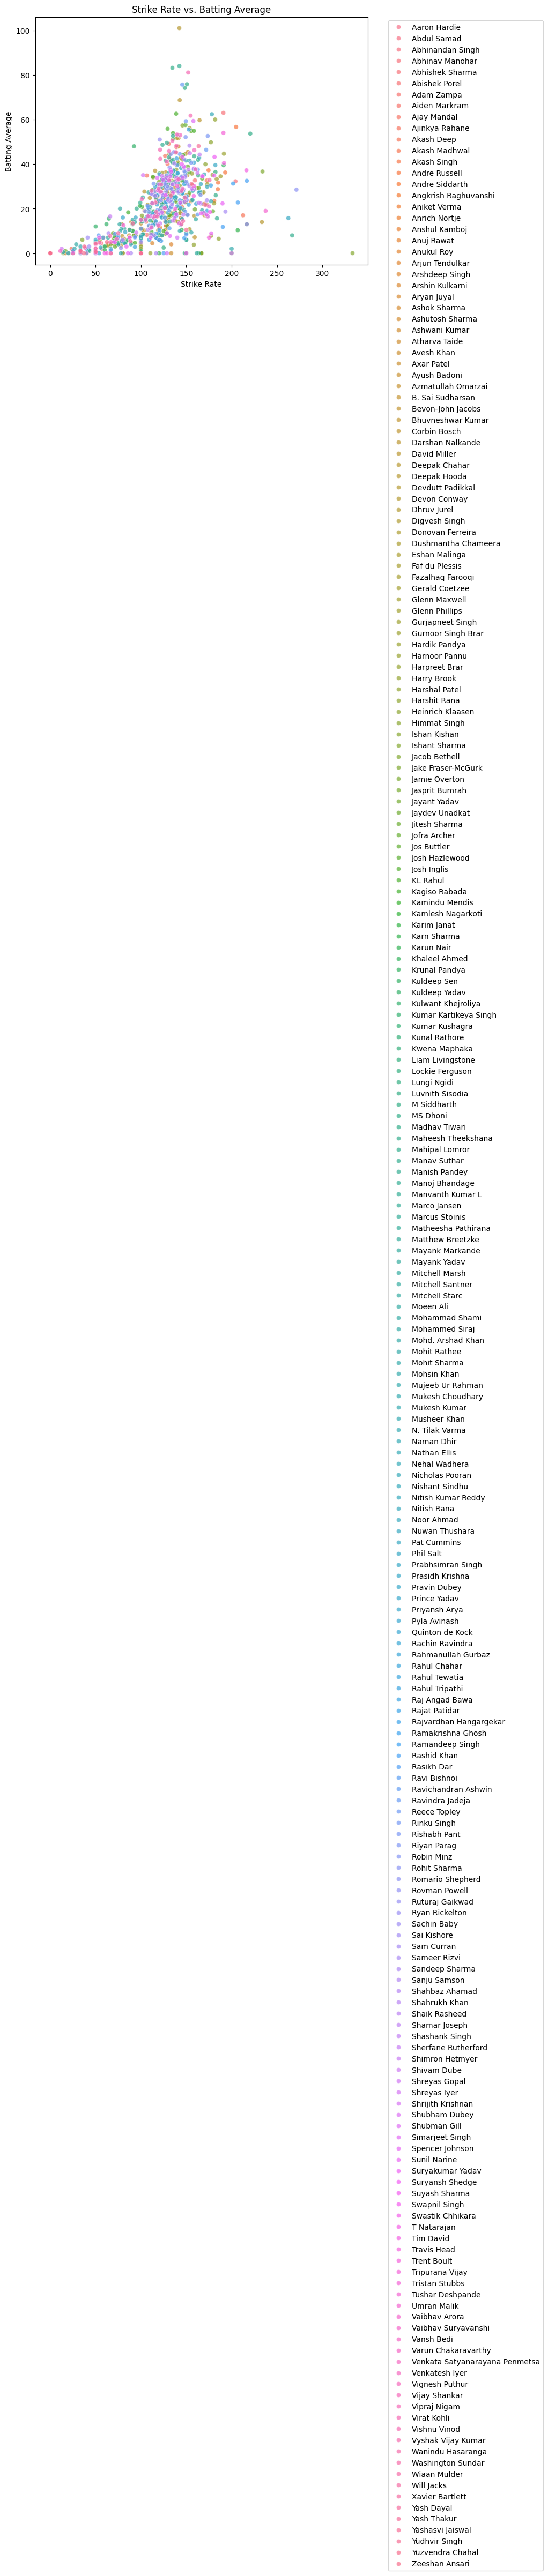

In [11]:
# Scatter plot: Strike Rate vs. Average
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Batting_Strike_Rate", y="Batting_Average", hue="Player_Name", alpha=0.7)
plt.title("Strike Rate vs. Batting Average")
plt.xlabel("Strike Rate")
plt.ylabel("Batting Average")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
